## libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## short variable description
* **date**: Date in MM-DD-YYYY format.
* **day**: Day of the week.
* **quarter**: Segment of the month divided into four quarters.
* **department**: Relevant department associated with the instance.
* **team_no**: Specific team number associated with the instance.
* **no_of_workers**: Quantity of workers in each team.
* **no_of_style_change**: Number of style alterations for a specific product.
* **targeted_productivity**: Planned productivity established by the authority for * each team per day.  
* **smv**: Standard Minute Value, indicating the allocated time for a task.
* **wip**: Work in progress, encompassing the quantity of unfinished items for products.
* **over_time**: Reflects the overtime duration by each team, measured in minutes.
* **incentive**: Represents the monetary incentive (in BDT) intended to encourage specific actions. 
* **idle_time**: Duration of time when production was interrupted due to various reasons.
* **idle_men**: Number of workers rendered idle due to production interruptions.
* **actual_productivity**: The actual percentage of productivity achieved by workers, ranging from 0 to 1.

In [4]:
df = pd.read_csv('/Users/polaparol/Documents/DS-sem4/consulting/productivity.csv')
df.info()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/polaparol/Documents/DS-sem4/consulting/productivity.csv'

In [ ]:
df.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


In [1]:
df.isnull().sum()

NameError: name 'df' is not defined

In [212]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [213]:
df.duplicated().sum() # no duplicates

0

In [214]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [215]:
df = pd.get_dummies(df, columns=['quarter'], prefix='quarter')
df.rename(columns = {'quarter_Quarter1':'quarter1','quarter_Quarter2':'quarter2', 'quarter_Quarter3':'quarter3', 'quarter_Quarter4':'quarter4', 'quarter_Quarter5':'quarter5' }, inplace = True)
df.drop('quarter5', axis=1, inplace=True)

In [216]:
df['day'] = pd.to_datetime(df['date']).apply(lambda x: x.day)
df['month'] = pd.to_datetime(df['date']).apply(lambda x: x.month)
df['num_week'] = pd.to_datetime(df['date']).apply(lambda x: x.weekofyear)
df.drop(['date'], axis=1, inplace=True)

In [217]:
df.sample(10)

,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter1,quarter2,quarter3,quarter4,month,num_week
385,finishing,22,6,0.80,2.90,NaN,4800,0,0.0,0,0,8.0,0.626823,0,0,0,1,1,4
1042,finishing,3,4,0.70,3.94,NaN,3360,0,0.0,0,0,8.0,0.555431,1,0,0,0,3,10
959,finishing,26,10,0.70,2.90,NaN,3360,0,0.0,0,0,8.0,0.410833,0,0,0,1,2,9
777,sweing,15,11,0.65,11.41,700.0,2640,23,0.0,0,2,53.0,0.650224,0,0,1,0,2,7
400,finishing,24,7,0.65,3.94,NaN,2160,0,0.0,0,0,12.0,0.870581,0,0,0,1,1,4
1084,finishing,5,9,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.453125,1,0,0,0,3,10
1040,finishing,3,2,0.40,3.90,NaN,6300,0,0.0,0,0,15.0,0.567378,1,0,0,0,3,10
448,sweing,26,10,0.75,22.52,1250.0,10080,55,0.0,0,0,56.0,0.800021,0,0,0,1,1,5
775,sweing,15,8,0.70,30.10,507.0,5880,40,2.0,10,1,59.0,0.700573,0,0,1,0,2,7
762,sweing,14,6,0.80,18.79,822.0,4080,0,0.0,0,0,34.0,0.557252,0,1,0,0,2,7


/var/folders/r6/7ckwh6lx77d_z3w19r_qvlhm0000gn/T/ipykernel_18812/2898307938.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                        quarter      team  targeted_productivity       smv  \
quarter                1.000000  0.021038              -0.112319 -0.000105   
team                   0.021038  1.000000               0.030274 -0.110011   
targeted_productivity -0.112319  0.030274               1.000000 -0.069489   
smv                   -0.000105 -0.110011              -0.069489  1.000000   
wip                   -0.085825 -0.033474               0.062054 -0.037837   
over_time              0.026654 -0.096737              -0.088557  0.674887   
incentive             -0.028237 -0.007674               0.032768  0.032629   
idle_time             -0.060779  0.003796              -0.056181  0.056863   
idle_men              -0.023884  0.026974              -0.053818  0.105901   
no_of_style_change     0.189905 -0.011194              -0.209294  0.315388   
no_of_workers         -0.005594 -0.075113              -0.084288  0.912176   
actual_productivity   -0.051970 -0.148753               0.421594

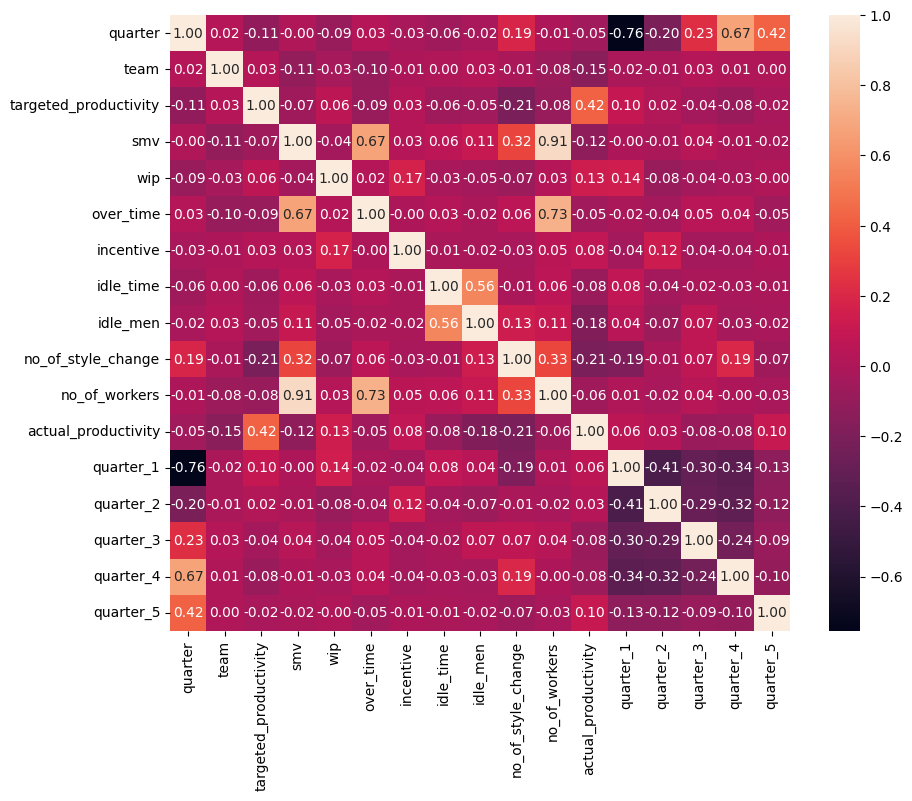

In [107]:
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

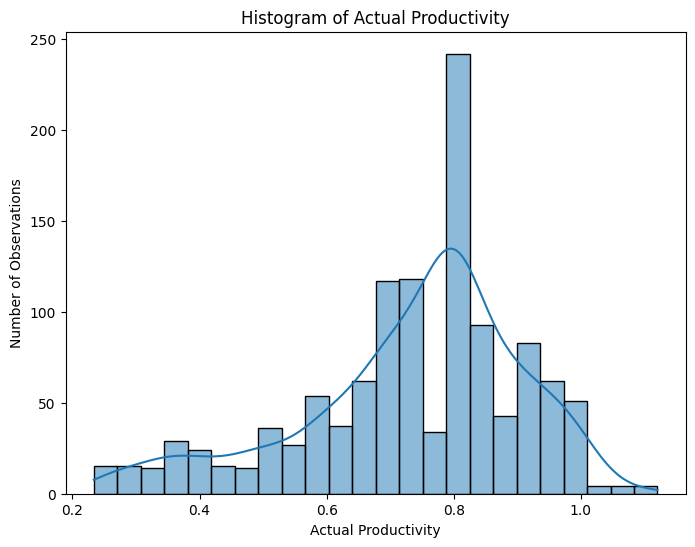

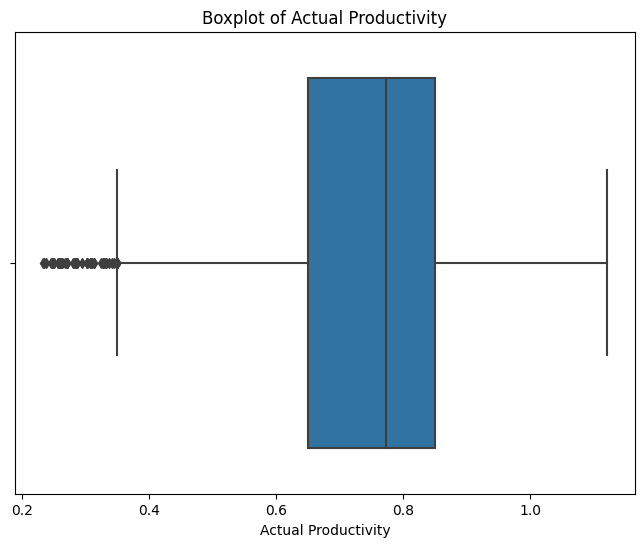

In [35]:
# Histogram of Actual Productivity
plt.figure(figsize=(8, 6))
sns.histplot(df['actual_productivity'], kde=True)
plt.title('Histogram of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Number of Observations')
plt.show()

# Boxplot of Actual Productivity
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['actual_productivity'])
plt.title('Boxplot of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.show()